<p><font size="5"><b>Projet de certification - SIMPLON DEV. DATA </b></font></p>


<p><font size="4"><b>*Accidents Routiers aux états unis : Analyse et visualisation </b></font></p>


<p><font size="3">*Source données : https://www.kaggle.com/sobhanmoosavi/us-accidents*</font></p>

*© 2020, ilham Noumir  (mailto:noumir.ilham@gmail.com)<br>
       

## <div class="alert alert-info"> 1. Importation des bibliothèques </div> 

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm  
import pandas as pd
import seaborn as sns
import datetime 
import pandas as pd
import datetime
import os
import numpy as np
import folium
from folium import plugins
import plotly.graph_objs as go
import plotly.express as px
import matplotlib.cm as cm

## <div class="alert alert-info"> 2. Chargement des données </div> 

In [14]:
df =  pd.read_csv('data_Us.csv' , index_col=0)
df.head(3)

C:\Users\Utilisateur\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance,Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,0.01,Right lane blocked due to accident on I-70 Eas...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,0.01,Accident on OH-32 State Route 32 Westbound at ...,...,False,False,False,False,True,False,Night,Night,Day,Day


## <div class="alert alert-info"> 3. Analyse </div> 

##  <p style="color:green;"><b>1. Répartition du nombre d'accident selon l'échelle de la gravité : </p><b>

Text(0.5, 0.98, "les accidents selon l'échelle de la gravité")

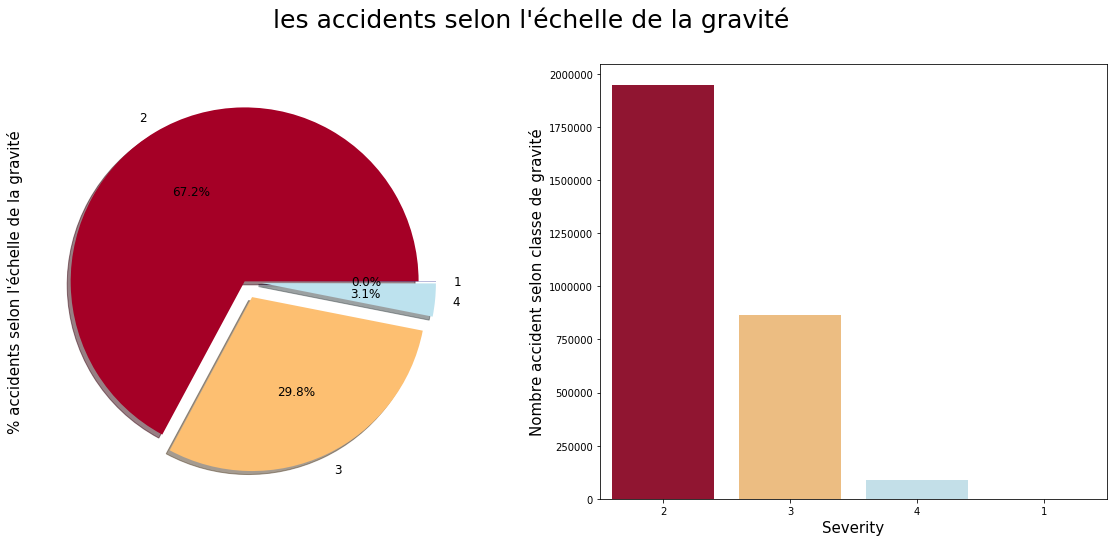

In [16]:
cmap = plt.get_cmap('RdYlBu')
colors = [cmap(i) for i in np.linspace(0, 1, 4)]
f,ax=plt.subplots(1,2 , figsize=(20,8))

df['Severity'].value_counts().plot.pie(explode=[0,0.1,0.1,0.1] , autopct='%1.1f%%',ax=ax[0], shadow=True , colors=colors ,textprops={'fontsize': 12})
ax[0].set_ylabel("% accidents selon l'échelle de la gravité" , fontsize= 15)
sns.countplot('Severity',data=df,ax=ax[1],order=df['Severity'].value_counts().index ,palette=colors)
ax[1].set_ylabel('Nombre accident selon classe de gravité' , fontsize= 15)
ax[1].set_xlabel('Severity' , fontsize= 15)
plt.suptitle("les accidents selon l'échelle de la gravité", fontsize=25)


##  <p style="color:green;"><b>2. Les états les plus touchés par les accidents routiers :  </p><b>

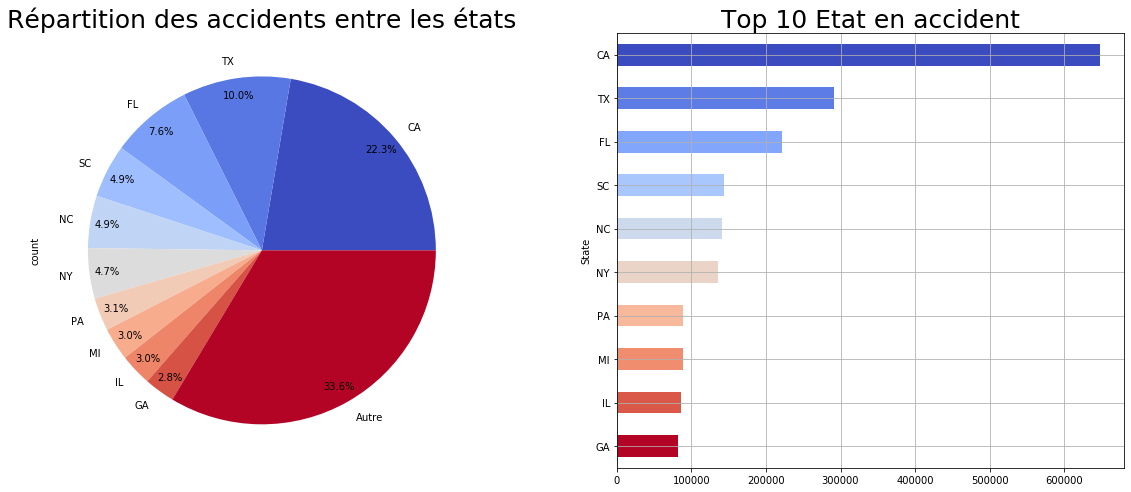

In [17]:
f,ax=plt.subplots(1,2 , figsize=(20,8))
count=df['State'].value_counts()
counts = list(count[:10])
groups = list(count.index[:10])
counts.append(count.sum()-count[:10].sum())
groups.append('Autre')
State = pd.DataFrame({"group": groups , "count" : counts})
cmap = plt.cm.coolwarm
color = cmap(np.linspace(0., 1., len(State)))

State['count'].plot(kind='pie' , labels=groups,autopct='%1.1f%%' , colors=color, pctdistance = 0.9 , ax = ax[0])
ax[0].set_title('Répartition des accidents entre les états' , fontsize= 25)


State_plot = df.groupby('State').size().sort_values(ascending= False).head(10).sort_values()
cmap = plt.cm.coolwarm
color = cmap(np.linspace(1., 0., len(State_plot)))
State_plot.plot(kind='barh', color=color , ax =ax[1])
ax[1].set_title('Top 10 Etat en accident' , fontsize= 25)
ax[1].grid()



##  <p style="color:green;"><b>3. La gravité selon les états :  </p><b>

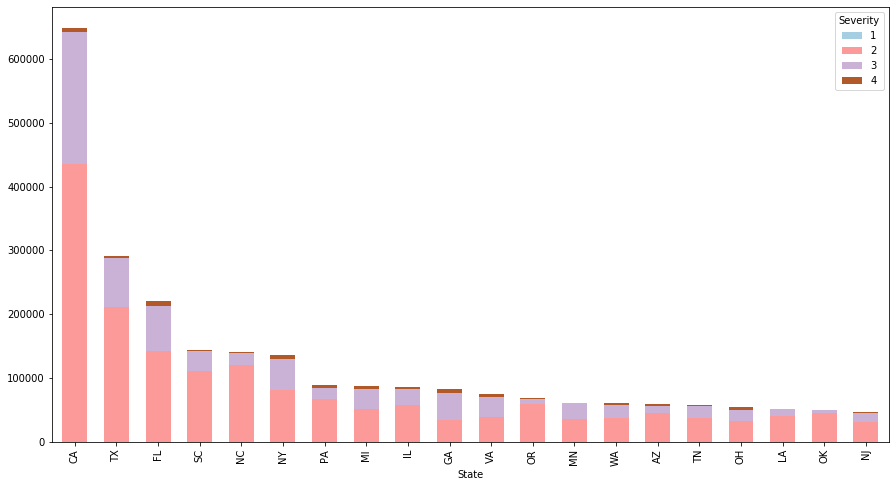

In [18]:
f,ax=plt.subplots(figsize=(15,8))
#df.groupby(['State', 'Severity']).size().unstack().fillna(0).head(40)
df_serity=df.groupby(['State', 'Severity']).size().unstack()
df_serity['somme'] = df_serity.sum(axis = 1, skipna = True)
df_serity= df_serity.sort_values(by= 'somme' , ascending= False)
exclude = ['somme']
df_serity.loc[:, df_serity.columns.difference(exclude)].head(20).plot(kind='bar' ,
                                                                      ax=ax ,
                                                                      width=0.6 ,
                                                                      stacked= True ,
                                                                      colormap = 'Paired')

##  <p style="color:green;"><b>4. Durée des accidents :</p><b>

In [19]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'] , errors= 'coerce')
df['End_Time'] = pd.to_datetime(df['End_Time'] , errors= 'coerce')
df['duree'] = df['End_Time'] - df['Start_Time']

les 20 premières durées d accident correspondent à 86.7% of the data


Text(0, 0.5, 'duree [minutes]')

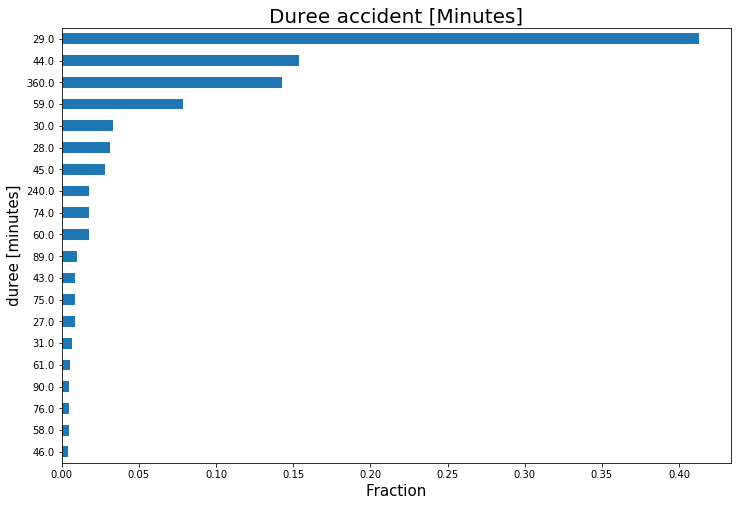

In [20]:

diff = df['duree']
top20 = diff.astype('timedelta64[m]').value_counts().nlargest(20)
print('les 20 premières durées d accident correspondent à {:.1f}% of the data'.format(top20.sum()*100/len(diff)))
(top20/top20.sum()).plot.barh(figsize=(12,8))
plt.title('Duree accident [Minutes]' , fontsize=20)
plt.xlabel('Fraction' , fontsize=15)
plt.gca().invert_yaxis()
plt.ylabel('duree [minutes]', fontsize=15)

##  <p style="color:green;"><b>5. L'effet des conditions météorologiques sur la survenance des accidents :</p><b>

In [22]:

df_weather = df.groupby('Weather_Condition').size().sort_values(ascending= False).reset_index()
df_weather = df_weather.rename(columns={0: 'Nbr_Accident'})
df_weather = df_weather.head(10)
fig= px.bar(df_weather ,x="Weather_Condition", y ="Nbr_Accident" , text='Nbr_Accident' ,color="Weather_Condition")
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.update_layout(title_text="Influence des conditions climatiques sur les accidents", title_x=0.5)
fig.show()


##  <p style="color:green;"><b>6.  La gravité des accidents routiers en fonction de : La visibilité , Humidité , Pression et Température :</p><b>

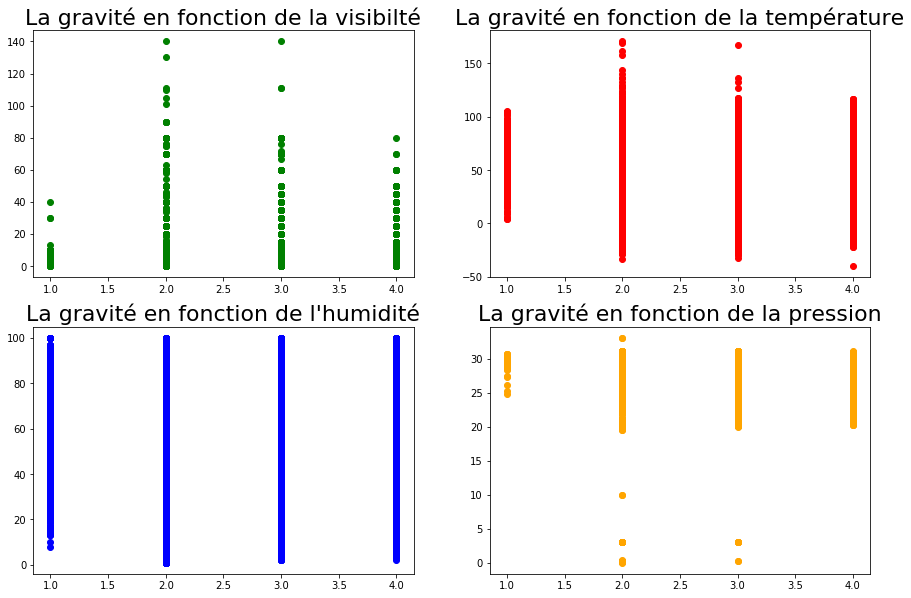

In [23]:

f,ax=plt.subplots(2,2 , figsize=(15,10))
ax[0,0].set_title('La gravité en fonction de la visibilté', fontsize=22)
ax[0,0].plot(df['Severity'], df['Visibility'], 'ko' , color='green')

ax[0,1].set_title('La gravité en fonction de la température', fontsize=22)
ax[0,1].plot(df['Severity'], df['Temperature'], 'ko' , color='red')

ax[1,0].set_title("La gravité en fonction de l'humidité", fontsize=22)
ax[1,0].plot(df['Severity'], df['Humidity'], 'ko' , color='blue')

ax[1,1].set_title("La gravité en fonction de la pression", fontsize=22)
ax[1,1].plot(df['Severity'], df['Pressure'], 'ko' , color='orange')




##  <p style="color:green;"><b>7. L'effet des objets routiers sur la survenance des accidents :</p><b>

In [24]:

bool_cols = [col for col in df.columns if df[col].dtype ==np.dtype('bool')]
booldf = df[bool_cols]
bools = booldf.sum(axis=0)

bools = bools.reset_index()
bools = bools.rename(columns= {'index':'Route_Object', 0: 'NBR'})
fig = px.pie(bools, values='NBR', names='Route_Object', color_discrete_sequence=px.colors.sequential.Aggrnyl)
fig.update_layout(title_text="l'influence des objets routiers", title_x=0.5 )

fig.show()

##  <p style="color:blue;"><b> L'analyse des accidents routiers en fonction du temps:</p><b>

In [25]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'] , errors= 'coerce')
df['End_Time'] = pd.to_datetime(df['End_Time'] , errors= 'coerce')

##  <p style="color:green;"><b> 8. Les accidents routiers par jour de la semaine et Mois de l'année :</p><b>

Text(0.5, 1.0, "nombre d'accident par jour de semaine")

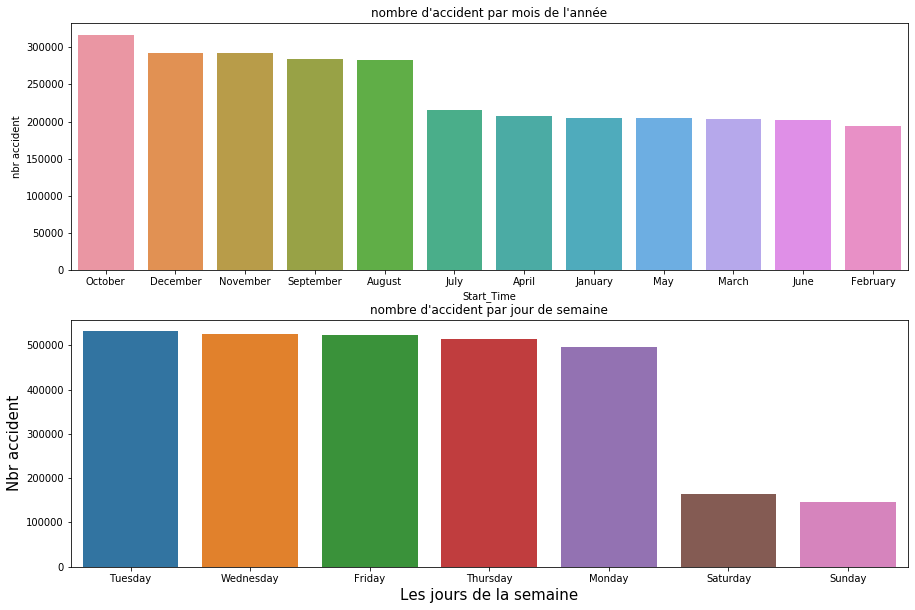

In [26]:

f,ax=plt.subplots(2,1, figsize=(15,10))
df_month = df.groupby(df.Start_Time.dt.month_name()).size().sort_values(ascending=False).reset_index()
df_month = df_month.rename(columns={0:'nbr accident'})
ax[0] = sns.barplot(x='Start_Time' , y="nbr accident" , data= df_month ,ax= ax[0])
ax[0].set_title("nombre d'accident par mois de l'année")
df_day = df.groupby(df.Start_Time.dt.day_name()).size().sort_values(ascending=False).reset_index()
df_day = df_day.rename(columns={0:'nbr accident'})
ax[1] = sns.barplot(x='Start_Time' , y="nbr accident" , data= df_day)
ax[1].set_xlabel('Les jours de la semaine' , fontsize=15)
ax[1].set_ylabel('Nbr accident' , fontsize=15)
ax[1].set_title("nombre d'accident par jour de semaine")


Text(Friday, 480000, 'Friday')

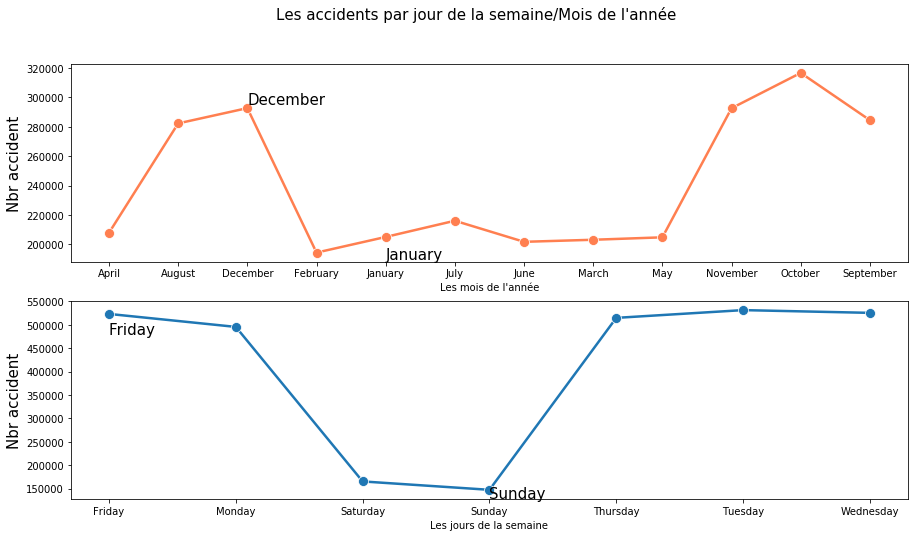

In [29]:
fig,ax=plt.subplots(2,1, figsize=(15,8))
fig.suptitle("Les accidents par jour de la semaine/Mois de l'année" , fontsize=15)

df_month = df.groupby(df.Start_Time.dt.month_name()).size().sort_values(ascending=False).reset_index()
df_month = df_month.rename(columns={0:'nbr accident'})
ax[0] = sns.lineplot(x='Start_Time' , y="nbr accident" , data= df_month ,lw=2.5, marker="o" ,markersize=10, color="coral", ax= ax[0] )
ax[0].set_xlabel("Les mois de l'année" , fontsize=10)
ax[0].set_ylabel('Nbr accident' , fontsize=15)


df_day = df.groupby(df.Start_Time.dt.day_name()).size().sort_values(ascending=False).reset_index()
df_day = df_day.rename(columns={0:'nbr accident'})
ax[1] = sns.lineplot(x='Start_Time' , y="nbr accident" , data= df_day ,lw=2.5,  marker="o" , markersize=10 )
ax[1].set_xlabel('Les jours de la semaine' , fontsize=10)
ax[1].set_ylabel('Nbr accident' , fontsize=15)



ax[0].annotate("January", xy=('January', 190000), xycoords="data", fontsize = 15)
ax[0].annotate("December", xy=('December', 295000), xycoords="data", fontsize = 15)
ax[1].annotate("Sunday", xy=('Sunday', 130000), xycoords="data", fontsize = 15)
ax[1].annotate("Friday", xy=('Friday', 480000), xycoords="data", fontsize = 15)


##  <p style="color:green;"><b> 9. Evolution des accidents routiers de 2016 à 2019  :</p><b>


C:\Users\Utilisateur\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Utilisateur\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Utilisateur\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pand

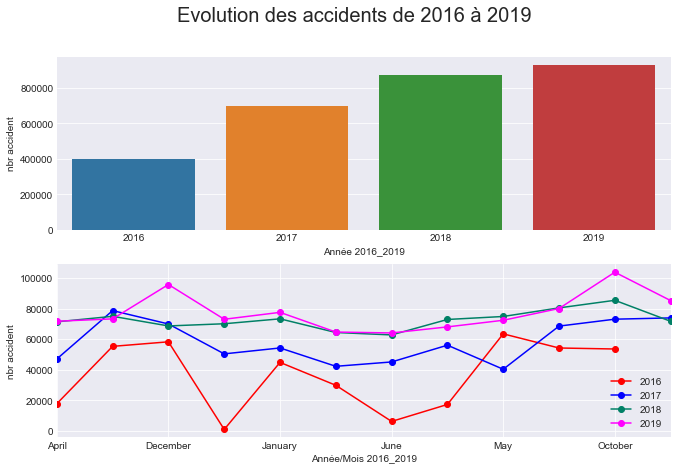

In [31]:
f,ax=plt.subplots(2,1, figsize=(11,7))
f.suptitle("Evolution des accidents de 2016 à 2019" , fontsize= 20)
df_year = df.groupby(df.Start_Time.dt.year).size().sort_values(ascending = False).reset_index()
df_year= df_year.rename(columns={0:'nbr accident'})
ax[0] = sns.barplot(x='Start_Time' , y="nbr accident" , data= df_year ,ax= ax[0])
ax[0].set_xlabel('Année 2016_2019')
df_Time = df[['ID','Start_Time']]
df_Time['year']= df_Time['Start_Time'].dt.year
df_Time['year']= df_Time['Start_Time'].dt.year
df_Time['month']= df_Time['Start_Time'].dt.month_name()
plt.style.use('seaborn-darkgrid')

df_Time_2016= df_Time[df_Time['year']== 2016]
df_Time_2017 = df_Time[df_Time['year']== 2017]
df_Time_2018 = df_Time[df_Time['year']== 2018]
df_Time_2019 = df_Time[df_Time['year']== 2019]

df_Time_2016.groupby('month')['ID'].count().plot(ax=ax[1], colormap="hsv", marker="o", label="2016")
df_Time_2017.groupby('month')['ID'].count().plot(ax=ax[1], colormap="winter", marker="o", label="2017")
df_Time_2018.groupby('month')['ID'].count().plot(ax=ax[1], colormap="summer", marker="o", label="2018")
df_Time_2019.groupby('month')['ID'].count().plot(ax=ax[1], colormap="spring", marker="o", label="2019")
ax[1].set_xlabel('Année/Mois 2016_2019')
ax[1].set_ylabel('nbr accident')

ax[1].legend()


C:\Users\Utilisateur\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Utilisateur\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Utilisateur\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.



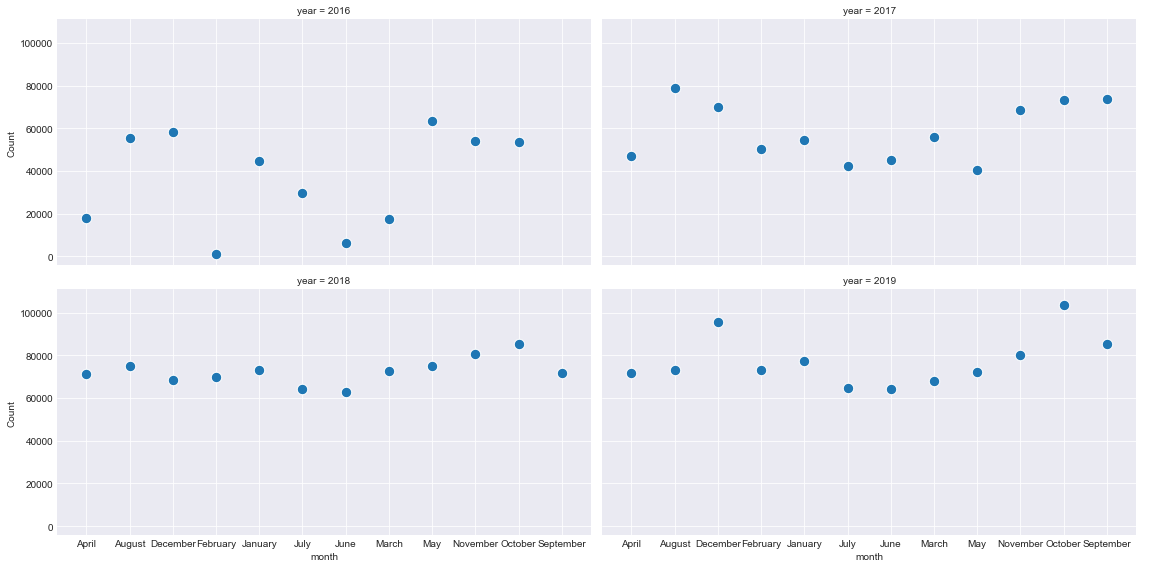

In [32]:
df_Time = df[['ID','Start_Time']]
df_Time['year'] = df_Time['Start_Time'].dt.year
df_Time['month']= df_Time['Start_Time'].dt.month_name()
df_Y_M = df_Time.groupby(['year','month']).size()
df_Y_M['year'] = df_Y_M.index.get_level_values(1)
df_Y_M= df_Y_M.reset_index()
df_Y_M= df_Y_M.rename(columns= {0:'Count'})
df_Y_M= df_Y_M.fillna(0)
df_Y_M = df_Y_M[df_Y_M['year']!= 'year']
g = sns.FacetGrid(df_Y_M, col="year"  , col_wrap=2 ,size=4, aspect=2)
g.map(plt.scatter, "month",  "Count" , edgecolor = "w" , alpha=1 , s= 110)
g.add_legend()


##  <p style="color:green;"><b> 10. Les accidents durant la semaine /en Weekend  :</p><b>

In [53]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df_Time['Hour'] = df_Time['Start_Time'].dt.hour
df_Time['jour']= df_Time.Start_Time.dt.day_name()
df_Time_weekend= df_Time[(df_Time['jour']=='Sunday') |(df_Time['jour']=='Saturday')]
df_Time_weekday = df_Time[(df_Time['jour']=='Monday') |(df_Time['jour']=='Tuesday')|(df_Time['jour']=='Wednesday') |(df_Time['jour']=='Thursday')| (df_Time['jour']=='Friday')]
hours = [hour for hour, df in df_Time.groupby('Hour')]


figure = go.Figure()
figure.add_trace(go.Scatter(x=hours, y=df_Time_weekend.groupby(['Hour'])['ID'].count(), name='weekend',
                         line=dict(color='firebrick', width=4)))
figure.add_trace(go.Scatter(x=hours, y=df_Time_weekday.groupby(['Hour'])['ID'].count(), name='weekday',
                         line=dict(color='royalblue', width=4)))
figure.update_layout(title_text="Les accidents durant la semaine/le weekend ", title_x=0.5 , xaxis_title="Heure",yaxis_title="Nombre d'accident")
figure




##  <p style="color:green;"><b> 11. Les accidents en Jour/ Nuit  :</p><b>

In [57]:
df_Sunrize= df.groupby('Sunrise_Sunset').size().reset_index()
df_Sunrize= df_Sunrize.rename(columns= {0: 'Nombre_accident'})
figure = go.Figure(data=[go.Pie(labels=df_Sunrize.Sunrise_Sunset, values=df_Sunrize.Nombre_accident ,pull=[0, 0.2])])
figure.show()

##  <p style="color:green;"><b> 12. Accident par coté de la rue droit/gauche   :</p><b>

Text(0.5, 1.0, 'Compte par coté de la rue')

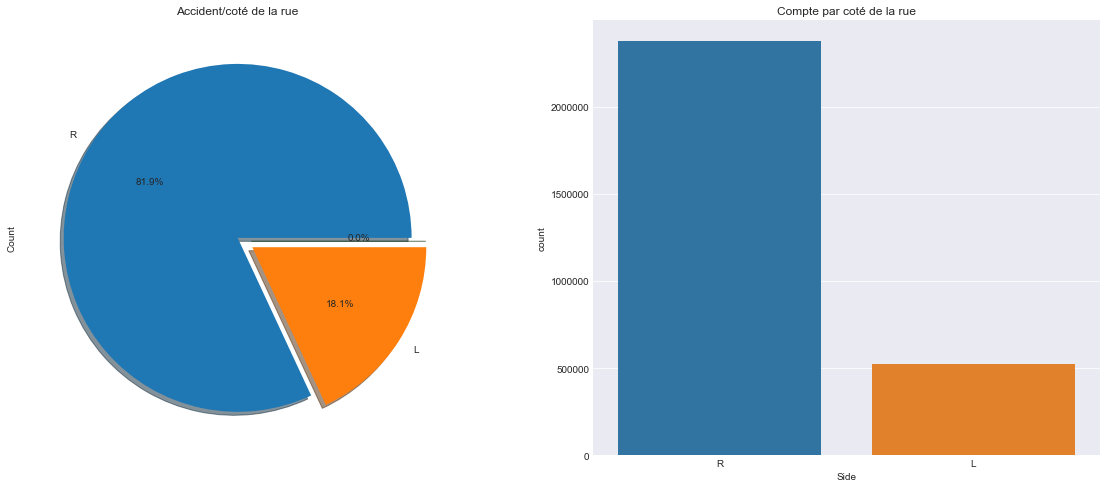

In [80]:
## Affiche le côté relatif de la rue (droite / gauche) dans le champ d'adresse.

f,ax=plt.subplots(1,2 , figsize=(20,8))
df['Side'].value_counts().plot.pie(explode=[0,0.1 ,0.1] , autopct='%1.1f%%',ax=ax[0], shadow=True)
ax[0].set_title("Accident/coté de la rue")
ax[0].set_ylabel('Count')
sns.countplot('Side',data=df,ax=ax[1],order=df['Side'].value_counts().head(2).index)
ax[1].set_title('Compte par coté de la rue')

##  <p style="color:green;"><b> 13. nombre d'accidents par fuseau horaire   :</p><b>


In [81]:
nbr_a_T = df.groupby('Timezone').size()
nbr_a_T= nbr_a_T.reset_index()
nbr_a_T = nbr_a_T.rename(columns={0: 'nbr accident par Timezone'})
nbr_a_T= nbr_a_T.sort_values('nbr accident par Timezone' , ascending = False)
nbr_a_T


,Timezone,nbr accident par Timezone
1,US/Eastern,1245156
3,US/Pacific,788972
0,US/Central,712191
2,US/Mountain,155517


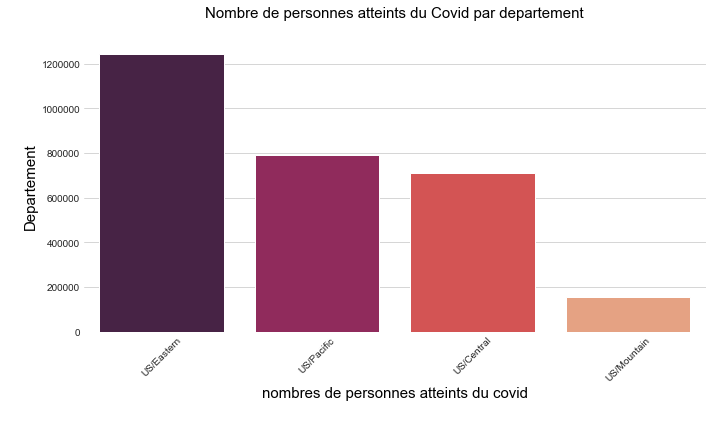

In [82]:
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
sns.barplot(x='Timezone' , y = 'nbr accident par Timezone' , data = nbr_a_T , palette="rocket")
plt.ylabel('\nDepartement', fontsize=15, color='#000000')
plt.xlabel("nombres de personnes atteints du covid\n", fontsize=15, color='#000000')
plt.title("Nombre de personnes atteints du Covid par departement\n", fontsize=15, color='#000000')
plt.xticks(rotation= 45)
plt.tight_layout()

##  <p style="color:green;"><b> 14. Les accidents selon la latitude et longitude   :</p><b>


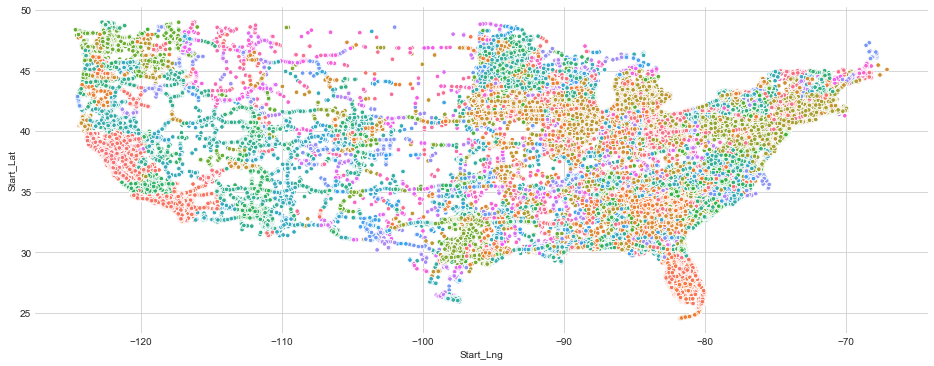

In [85]:
fig, ax= plt.subplots(1, 1, figsize=(16, 6))
sns.scatterplot(x='Start_Lng', y='Start_Lat', data=df, hue='County', legend=False, s=20)
plt.show()